In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [21]:
num_classes = 10
input_shape = (28, 28, 1)

# Load data and split it to train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Scale pictures (values from 0-255 to 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [22]:
model = keras.Sequential([
    # Ensimmäinen konvoluutiokerros
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    # Toinen konvoluutiokerros
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Regularisointi
    layers.Dense(10, activation='softmax')
])

# Käännä malli
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
batch_size = 4
epochs = 10

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test))


Epoch 1/10
12500/12500 [==============================] - 64s 5ms/step - loss: 1.5407 - accuracy: 0.4406 - val_loss: 1.1780 - val_accuracy: 0.5870
Epoch 2/10
12500/12500 [==============================] - 56s 4ms/step - loss: 1.2387 - accuracy: 0.5579 - val_loss: 1.0743 - val_accuracy: 0.6193
Epoch 3/10
12500/12500 [==============================] - 54s 4ms/step - loss: 1.1328 - accuracy: 0.6049 - val_loss: 1.0789 - val_accuracy: 0.6269
Epoch 4/10
12500/12500 [==============================] - 53s 4ms/step - loss: 1.0721 - accuracy: 0.6254 - val_loss: 1.0075 - val_accuracy: 0.6550
Epoch 5/10
12500/12500 [==============================] - 54s 4ms/step - loss: 1.0196 - accuracy: 0.6444 - val_loss: 0.9877 - val_accuracy: 0.6573
Epoch 6/10
12500/12500 [==============================] - 54s 4ms/step - loss: 0.9866 - accuracy: 0.6550 - val_loss: 1.0449 - val_accuracy: 0.6556
Epoch 7/10
 5593/12500 [============>.................] - ETA: 27s - loss: 0.9385 - accuracy: 0.6698

KeyboardInterrupt: 

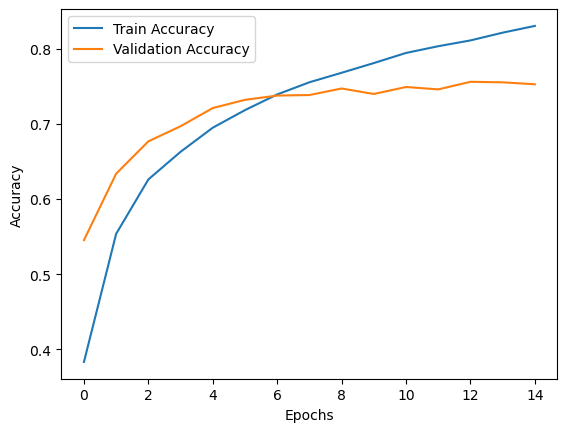

In [5]:
plt.plot(history.history["loss"], label="Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.grid()
plt.show()


In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


313/313 - 7s - loss: 0.7900 - accuracy: 0.7526 - 7s/epoch - 22ms/step
Testitarkkuus: 75.26%


1/1 [==============================] - 0s 126ms/step


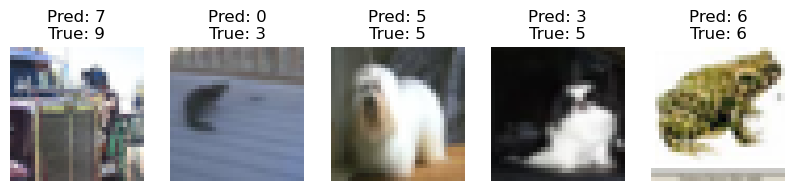

In [7]:
import random

# Valitse satunnaisia kuvia testidatasta
num_images = 5
indices = random.sample(range(len(x_test)), num_images)
sample_images = x_test[indices]
sample_labels = y_test[indices]

# Ennusta mallilla
predictions = model.predict(sample_images)

# Näytä kuvat ja mallin ennusteet
fig, axes = plt.subplots(1, num_images, figsize=(10,3))
for i, ax in enumerate(axes):
    ax.imshow(sample_images[i])
    ax.set_title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(sample_labels[i])}")
    ax.axis('off')

plt.show()
